# Predicting House Prices Using Advanced Regression Techniques

This notebook looks into using Python-based machine learning and data science libraries to build a model capable of predicting the final sales price of homes. The dataset contains 79 explanatory variables covering various aspects of residential homes.

This notebook will be broken into 6 sections:

    1. Problem definition
    2. Data
    3. Evaluation
    4. Features
    5. Modelling
    6. Experimentation
    7. Submission

## 1. Problem Definition

In a statement:  
> Given features describing a residential property, can we predict the final sales price of that home?

## 2. Data

The data for this competition comes from the "House Prices - Advanced Regression Techniques" competition hosted on Kaggle.

Provided with:

* `train.csv`: Training data including features and sale prices
* `test.csv`: Test data without sale prices (for submission)
* `data_description.txt`: Detailed information about each feature
* `sample_submission.csv`: Example of submission format

## 3. Evaluation

**Goal:**  
Build a regression model that predicts house sale prices as accurately as possible.

**Metric:**  
Submissions are evaluated using **Root Mean Squared Log Error (RMSLE)** between the predicted and actual sale prices.

## 4. Features and Feature Engineering

**Features**

- **SalePrice** - the property's sale price in dollars. This is the target variable that you're trying to predict.
- **MSSubClass**: The building class
- **MSZoning**: The general zoning classification
- **LotFrontage**: Linear feet of street connected to property
- **LotArea**: Lot size in square feet
- **Street**: Type of road access
- **Alley**: Type of alley access
- **LotShape**: General shape of property
- **LandContour**: Flatness of the property
- **Utilities**: Type of utilities available
- **LotConfig**: Lot configuration
- **LandSlope**: Slope of property
- **Neighborhood**: Physical locations within Ames city limits
- **Condition1**: Proximity to main road or railroad
- **Condition2**: Proximity to main road or railroad (if a second is present)
- **BldgType**: Type of dwelling
- **HouseStyle**: Style of dwelling
- **OverallQual**: Overall material and finish quality
- **OverallCond**: Overall condition rating
- **YearBuilt**: Original construction date
- **YearRemodAdd**: Remodel date
- **RoofStyle**: Type of roof
- **RoofMatl**: Roof material
- **Exterior1st**: Exterior covering on house
- **Exterior2nd**: Exterior covering on house (if more than one material)
- **MasVnrType**: Masonry veneer type
- **MasVnrArea**: Masonry veneer area in square feet
- **ExterQual**: Exterior material quality
- **ExterCond**: Present condition of the material on the exterior
- **Foundation**: Type of foundation
- **BsmtQual**: Height of the basement
- **BsmtCond**: General condition of the basement
- **BsmtExposure**: Walkout or garden level basement walls
- **BsmtFinType1**: Quality of basement finished area
- **BsmtFinSF1**: Type 1 finished square feet
- **BsmtFinType2**: Quality of second finished area (if present)
- **BsmtFinSF2**: Type 2 finished square feet
- **BsmtUnfSF**: Unfinished square feet of basement area
- **TotalBsmtSF**: Total square feet of basement area
- **Heatin**g: Type of heating
- **HeatingQC**: Heating quality and condition
- **CentralAir**: Central air conditioning
- **Electrical**: Electrical system
- **1stFlrSF**: First Floor square feet
- **2ndFlrSF**: Second floor square feet
- **LowQualFinSF**: Low quality finished square feet (all floors)
- **GrLivArea**: Above grade (ground) living area square feet
- **BsmtFullBath**: Basement full bathrooms
- **BsmtHalfBath**: Basement half bathrooms
- **FullBath**: Full bathrooms above grade
- **HalfBath**: Half baths above grade
- **Bedroom**: Number of bedrooms above basement level
- **Kitchen**: Number of kitchens
- **KitchenQual**: Kitchen quality
- **TotRmsAbvGrd**: Total rooms above grade (does not include bathrooms)
- **Functional**: Home functionality rating
- **Fireplaces**: Number of fireplaces
- **FireplaceQu**: Fireplace quality
- **GarageType**: Garage location
- **GarageYrBlt**: Year garage was built
- **GarageFinish**: Interior finish of the garage
- **GarageCars**: Size of garage in car capacity**
- **GarageArea**: Size of garage in square feet
- **GarageQual**: Garage quality
- **GarageCond**: Garage condition
- **PavedDrive**: Paved driveway
- **WoodDeckSF**: Wood deck area in square feet
- **OpenPorchSF**: Open porch area in square feet
- **EnclosedPorch**: Enclosed porch area in square feet
- **3SsnPorch**: Three season porch area in square feet
- **ScreenPorch**: Screen porch area in square feet
- **PoolArea**:-  Pool area in square feet
- **PoolQC**: Pool quality
- **Fence**: Fence quality
- **MiscFeature**: Miscellaneous feature not covered in other categories
- **MiscVal**: $Value of miscellaneous feature
- **MoSold**: Month Sold
- **YrSold**: Year Sold
- **SaleType**: Type of sale
- **SaleCondition**: Condition of sale

### Preparing the tools

We're going to use pandas, matplotlib, seaborn, and NumPy for data analysis and visualization. We'll also use advanced regression libraries and tools for modeling and evaluation.

In [1]:
# Importing essential libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats

# Import some math and scikit-learn tools
from math import sqrt
from sklearn.model_selection import KFold, cross_val_score

# Optuna for hyperparameter optimization
# Finds best settings for CatBoost model and XGBoost
# Usefull for .best_params
import optuna

# Gradient boosting, using Catboost and XGBoost
# Catboost handles categorical features automatically, good for categorical data, prevents overfitting well
# XGBoost handles missing values well, good for structured/tabular data, and excellent for regression with high accuracy
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

# Suppress warning messages to clean output during modeling
import warnings
warnings.filterwarnings('ignore')

# B=No column cutoff when printing DataFrames
pd.set_option('display.max_columns', None)

### Load the Data

In [2]:
training_set=pd.read_csv("./data/train.csv")
testing_set=pd.read_csv("./data/test.csv")
sample=pd.read_csv("./data/sample_submission.csv")

### Data Exploration

Looking into the data to understand the subject matter better.

In [3]:
print("The shape of the training data is {}".format(training_set.shape))
print("The shape of theTraining data is {}".format(testing_set.shape))

training_set.head()

The shape of the training data is (1460, 81)
The shape of theTraining data is (1459, 80)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Creating Visualization of the Target Feature to Identify any Trends

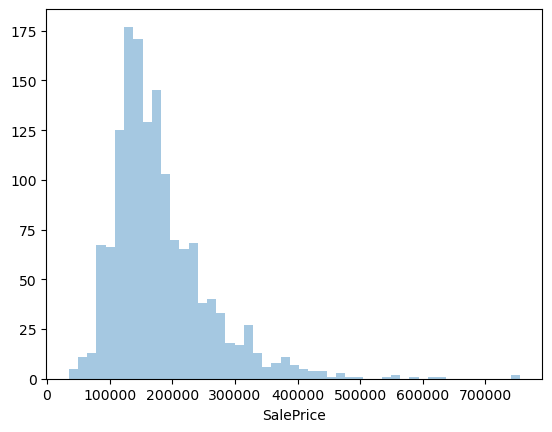

In [4]:
# Distributions of values in target feature
sns.distplot(training_set.get('SalePrice'), kde=False)
plt.show()

The distribution is right-skewed, meaning there are **outliers** in the sale prices that can affect the overall model's performance.

To combat this, we will perform a **log transformation** on this feature.

We chose a log transformation because it helps reduce the impact of extreme values (outliers) and makes the distribution more normal, which can improve the accuracy of the machine learning model.

**Log transformation compresses large values more than small ones**, reducing the impact of outliers and making the data more normally distributed.

#### Visualizing the Outliers

Will utilize boxplots here to visualize the outliers because they make it easy to see which values are unusually high or low compared to the middle range of the data.

Won't delete any outliers to avoid risking deleting important data in a row, all because 1 column has it listed as an outlier.

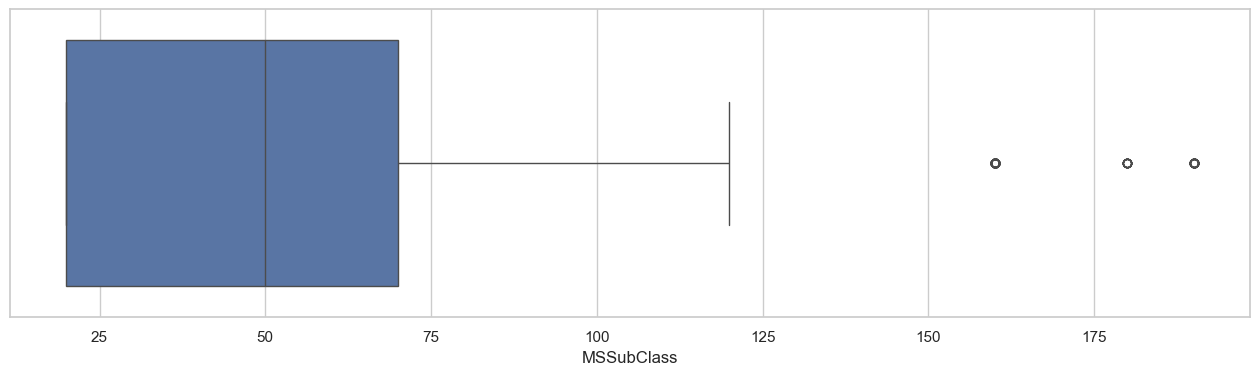

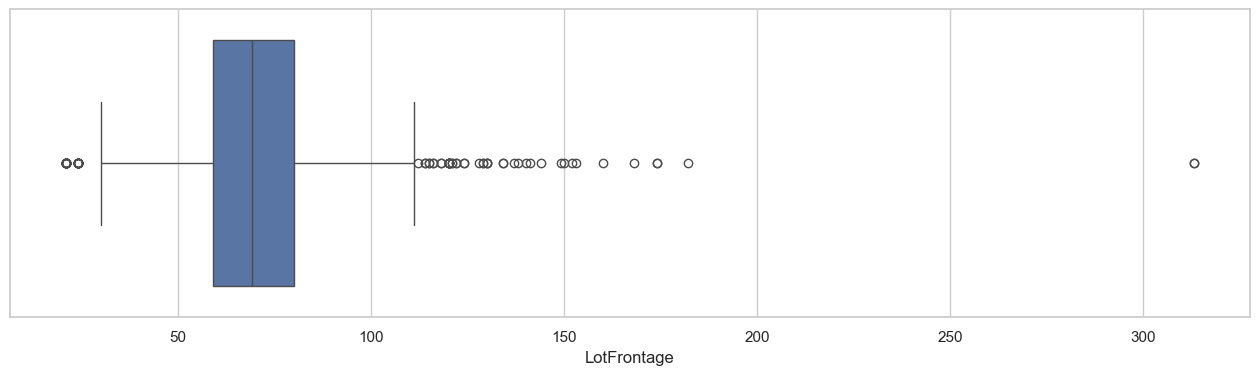

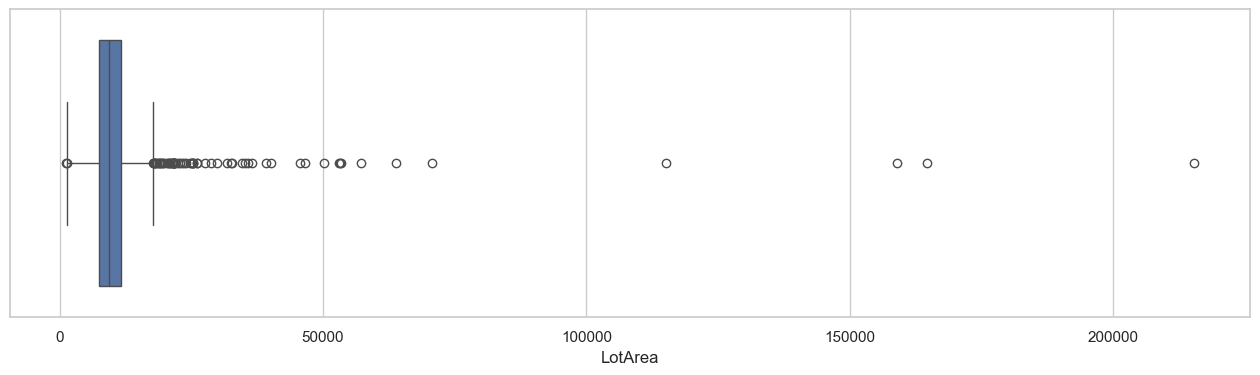

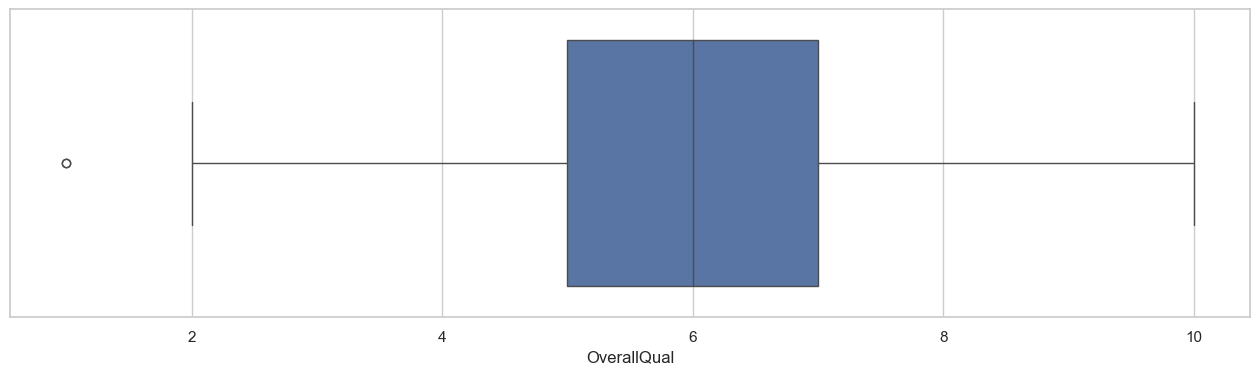

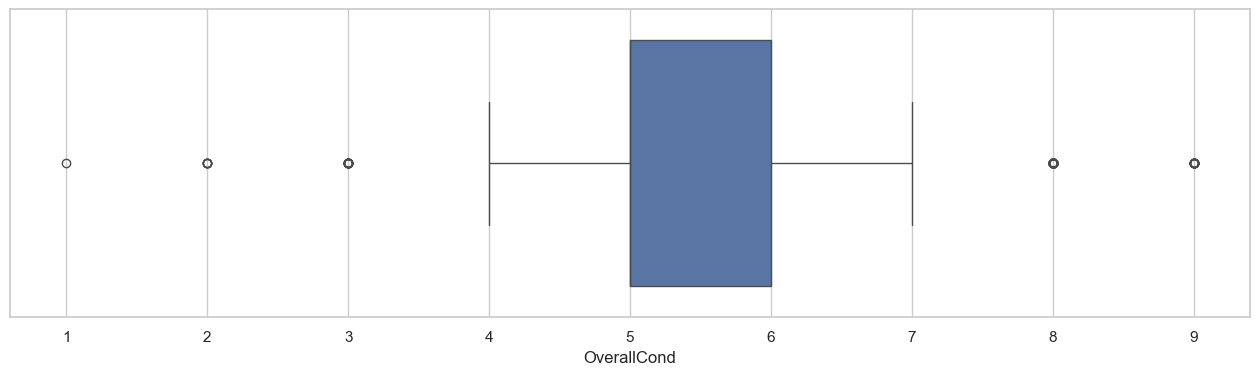

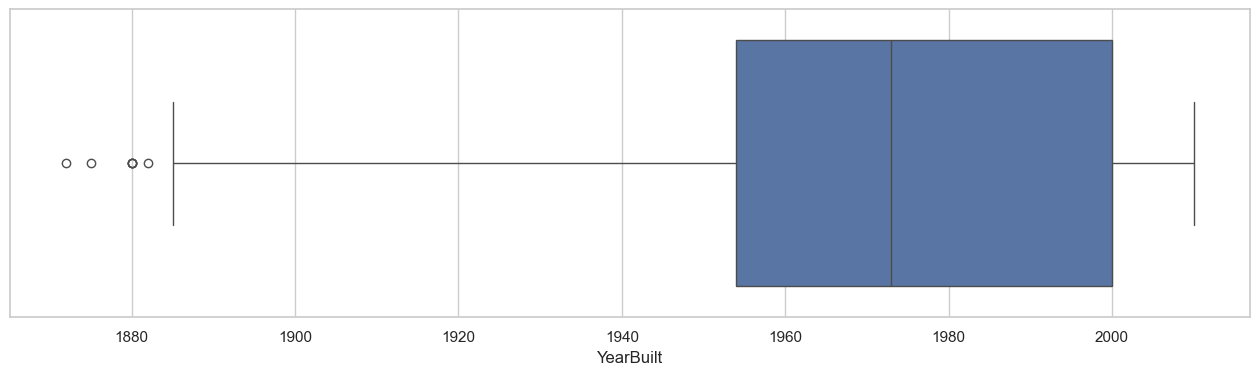

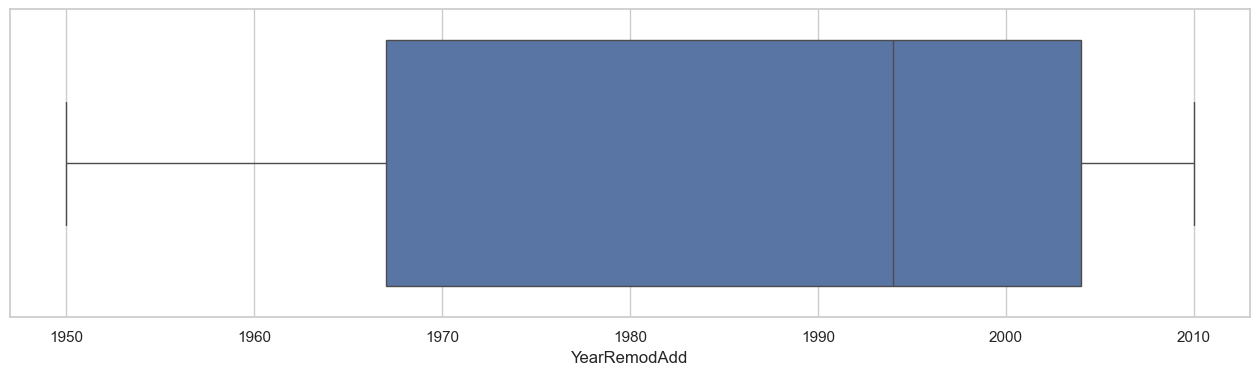

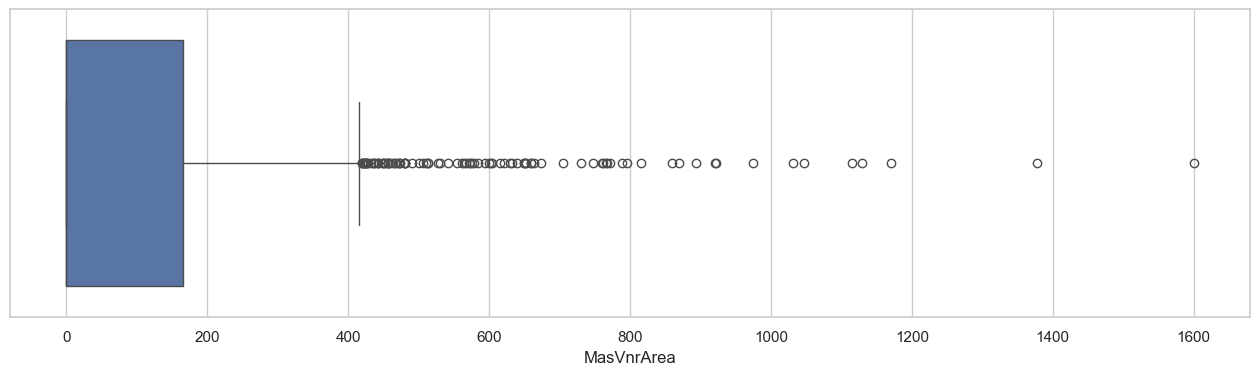

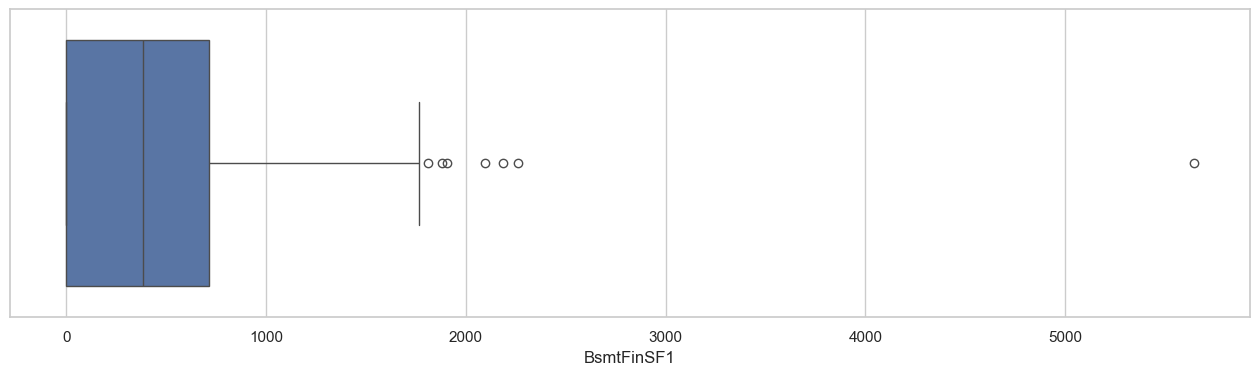

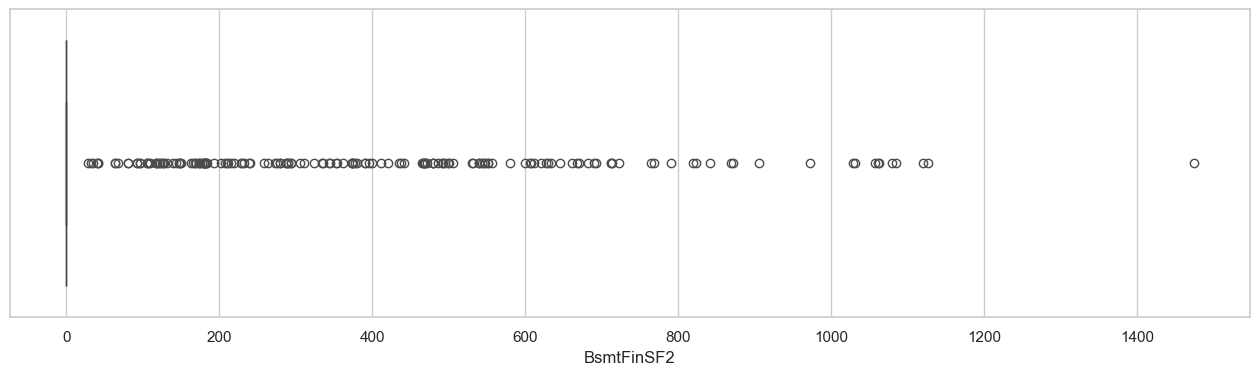

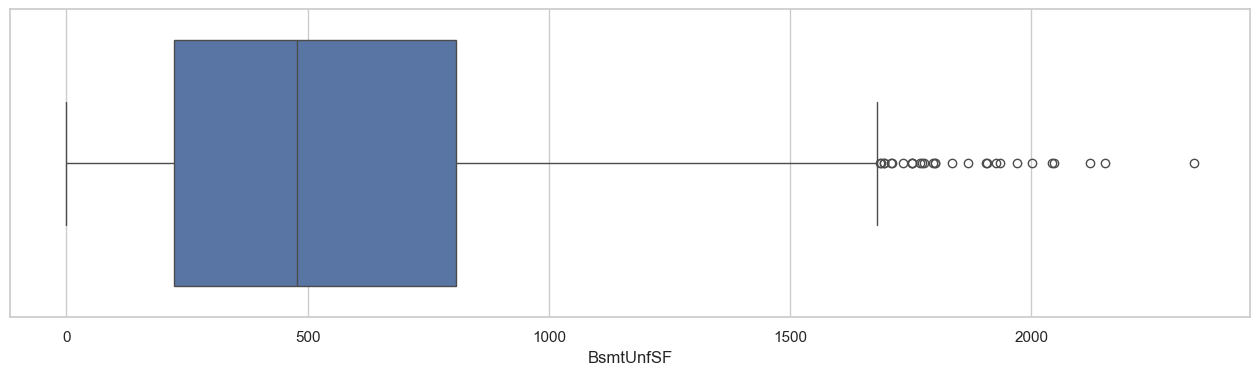

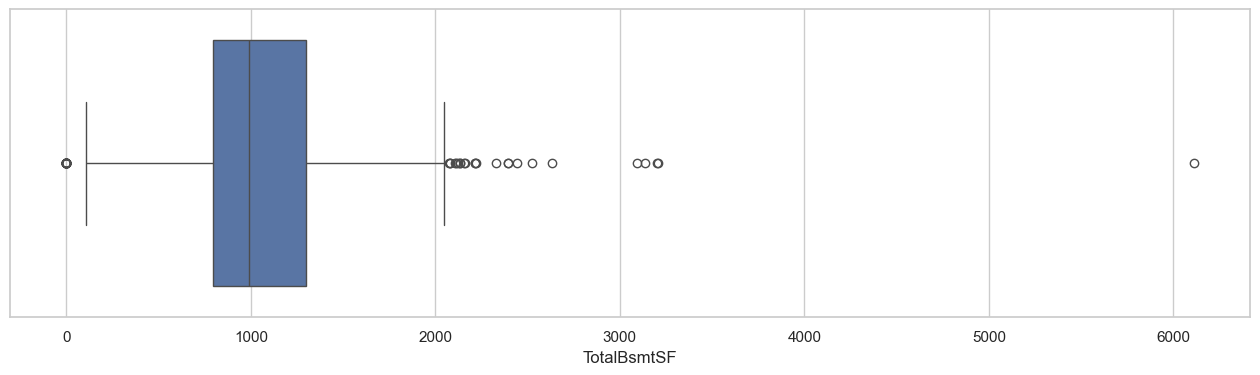

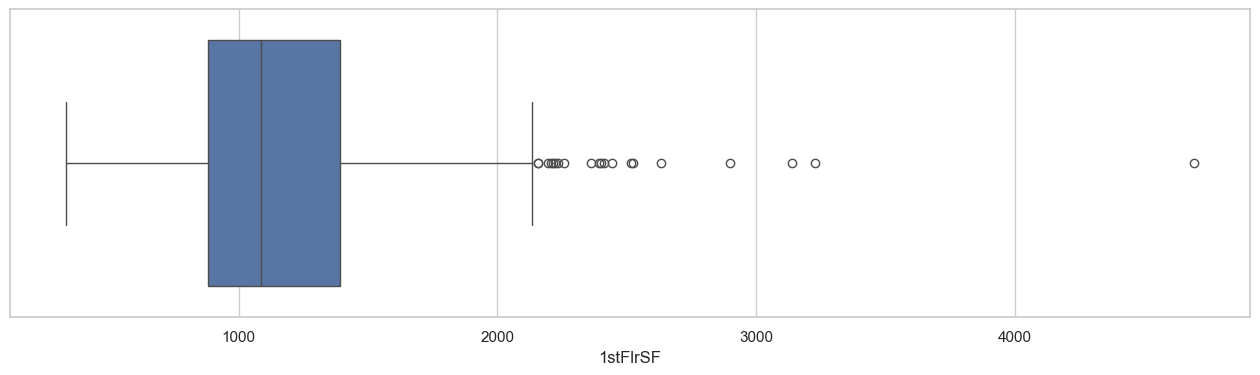

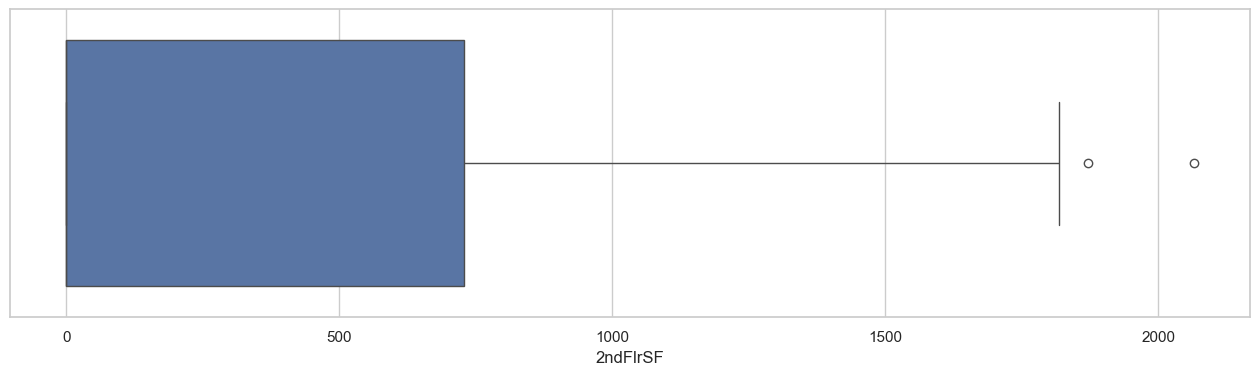

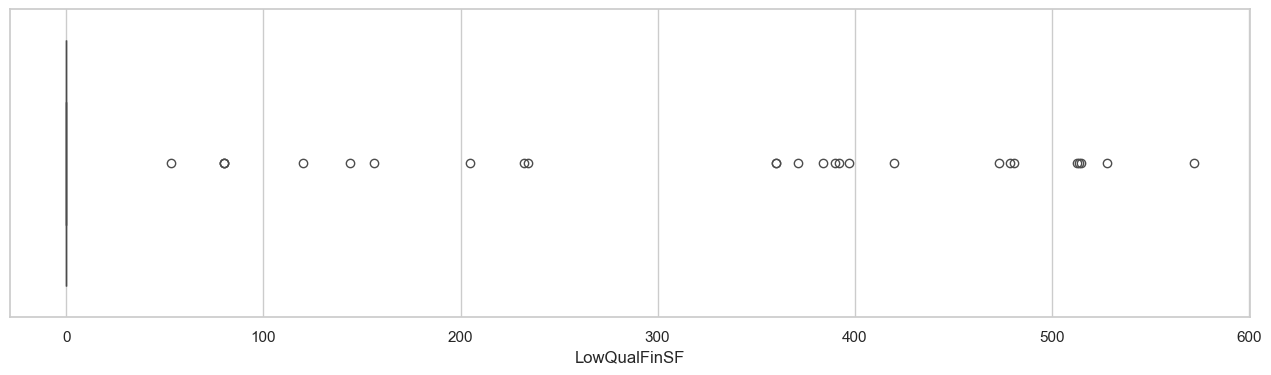

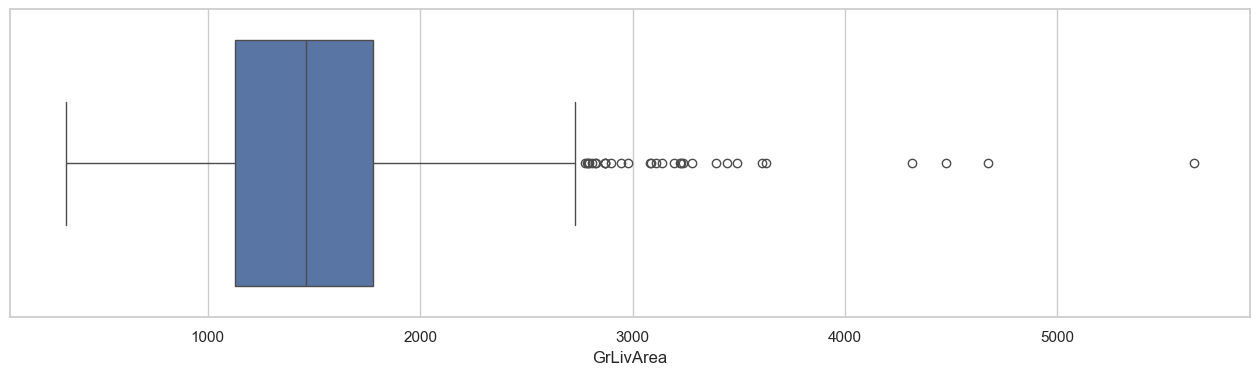

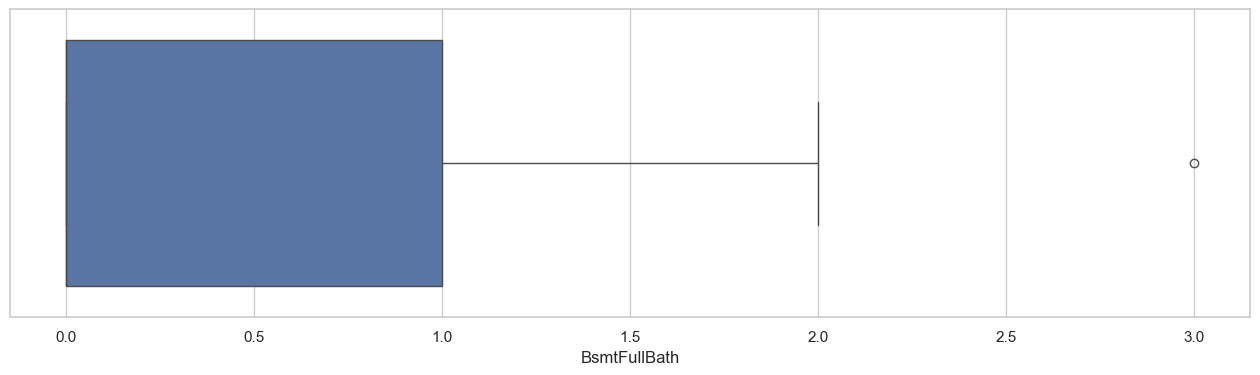

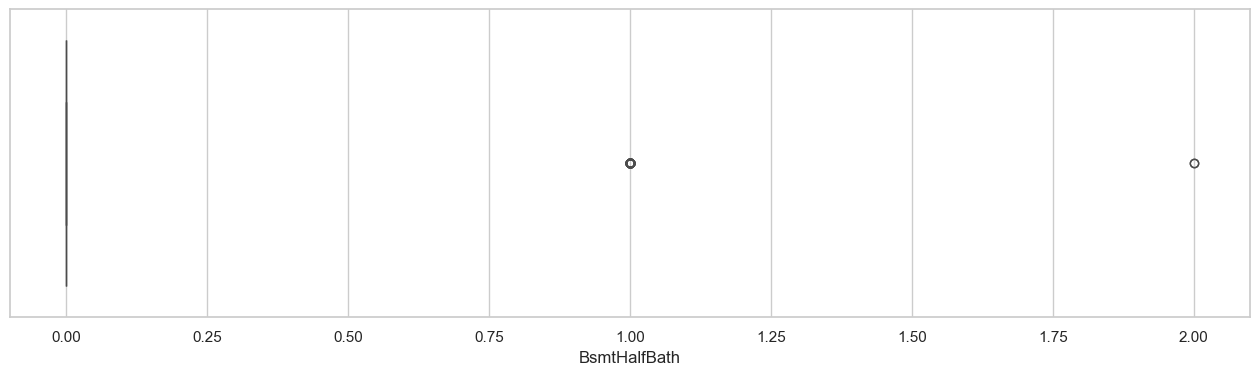

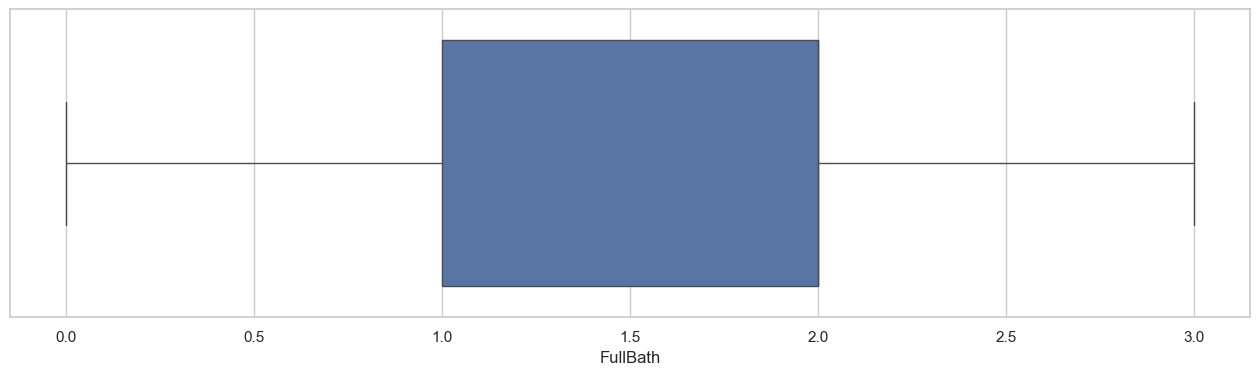

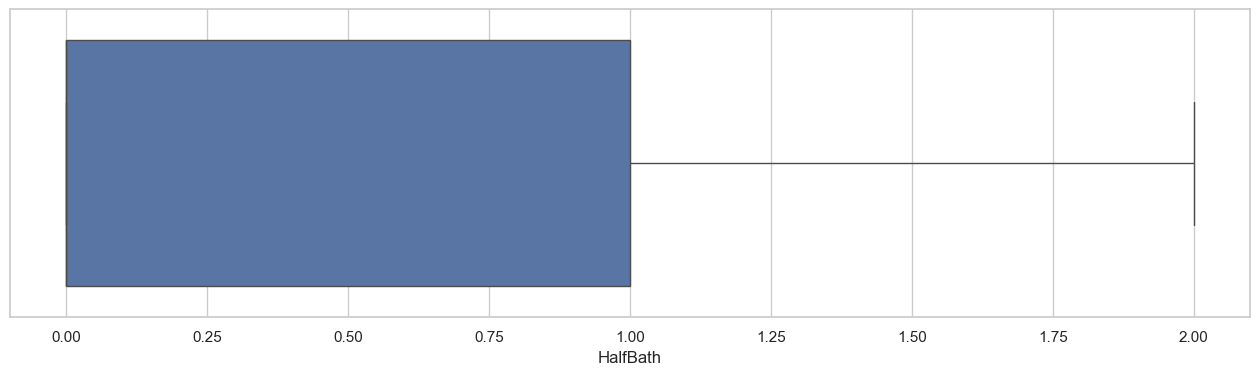

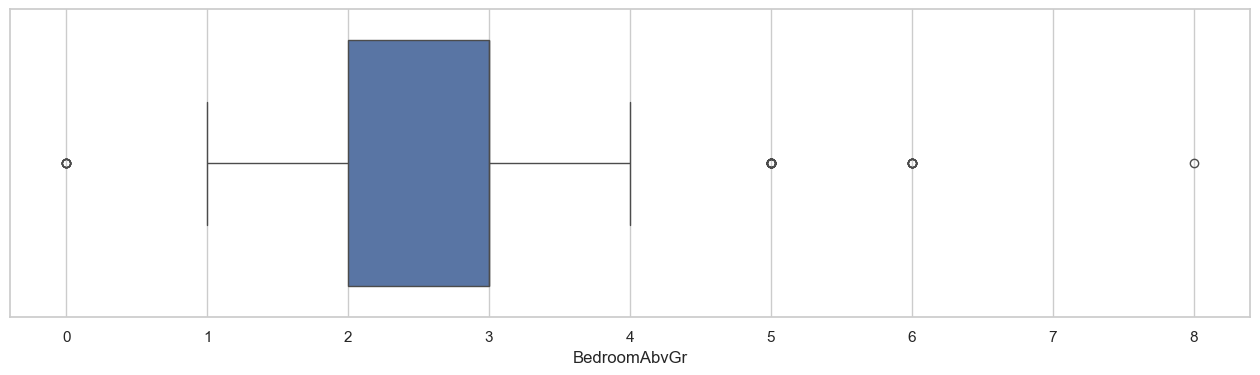

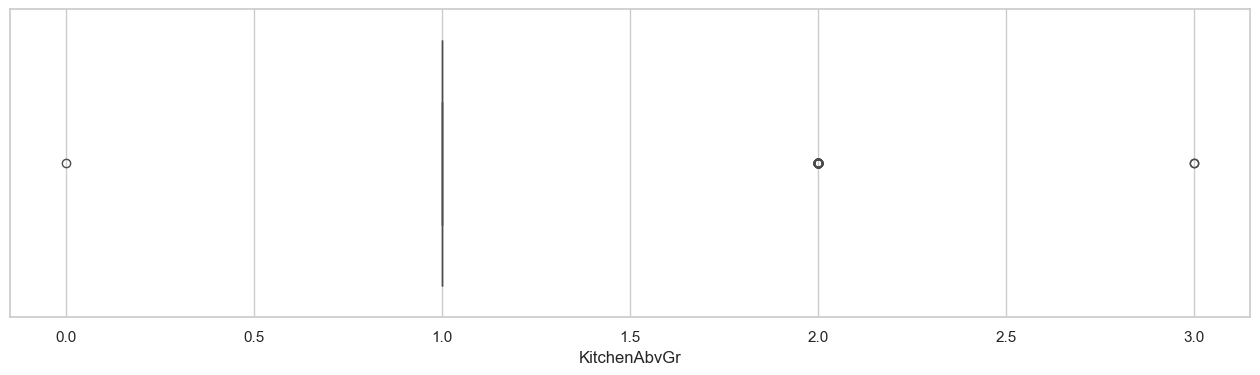

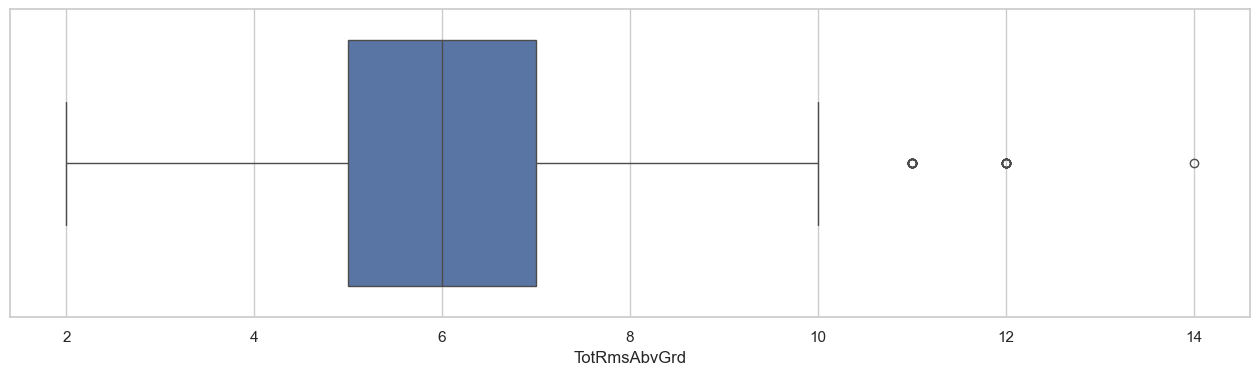

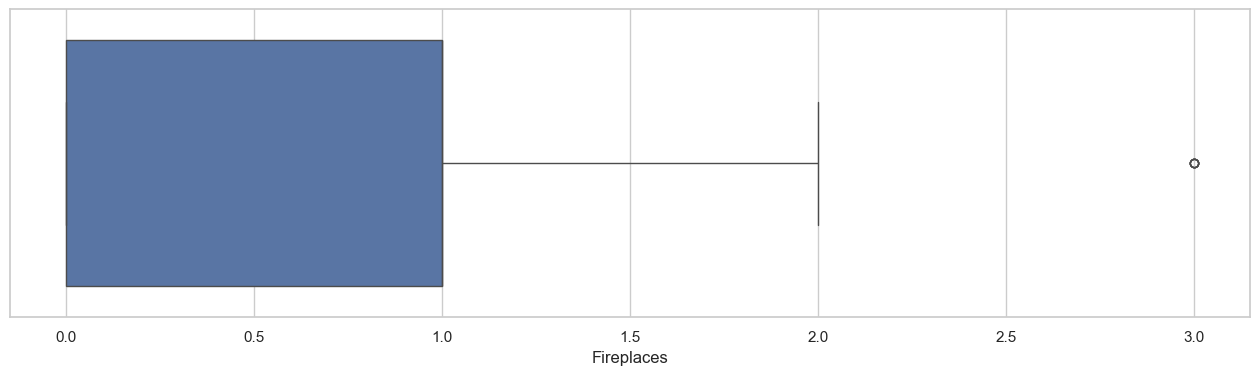

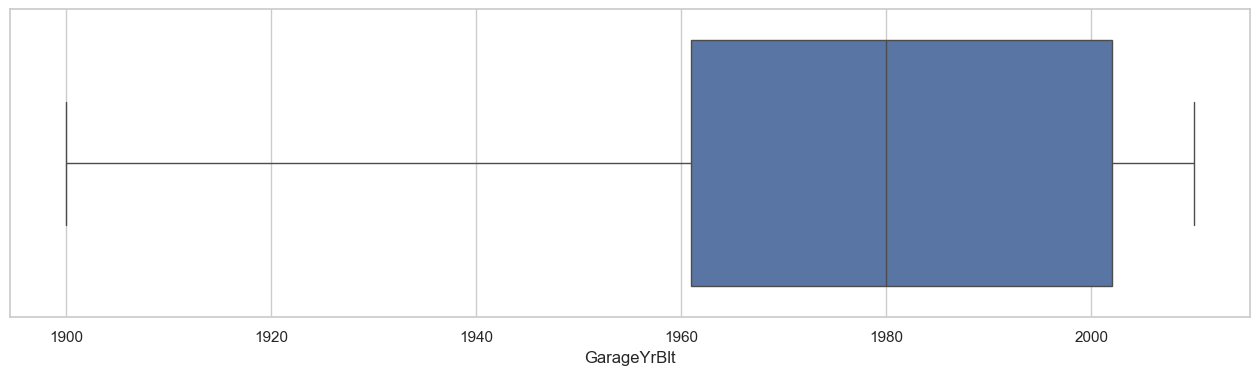

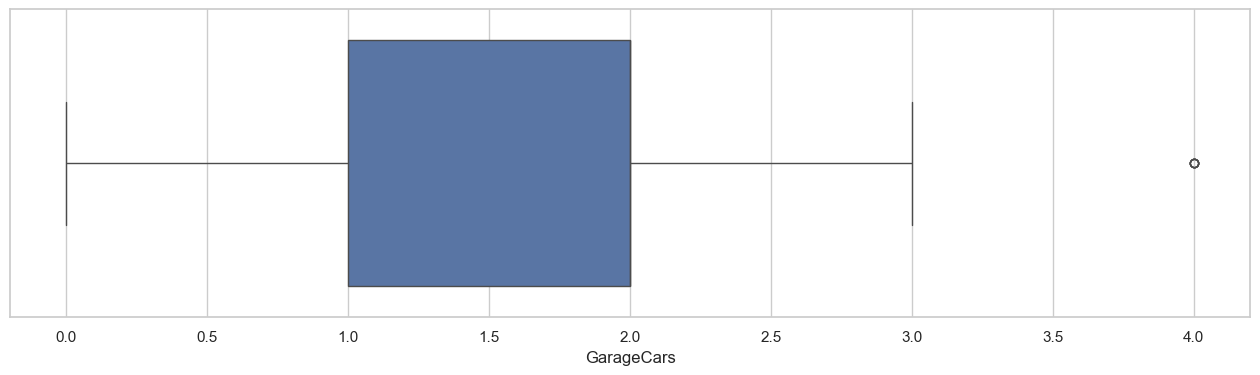

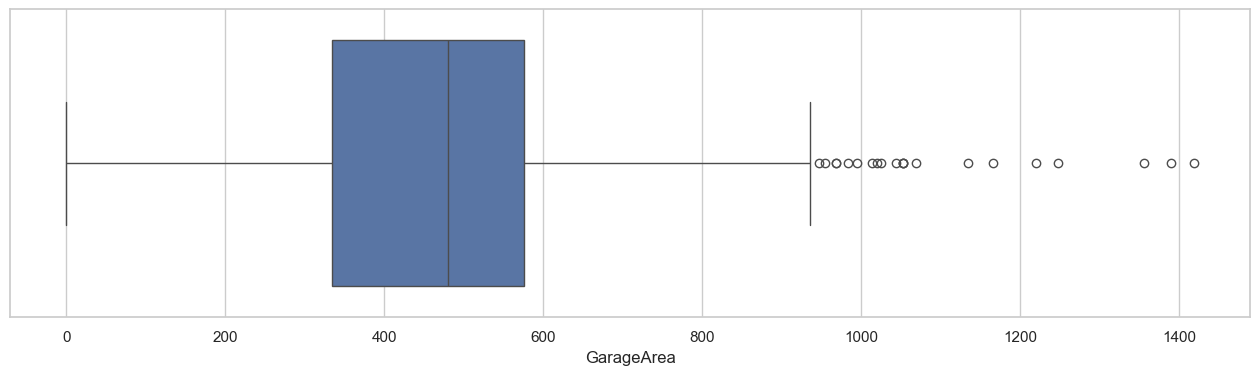

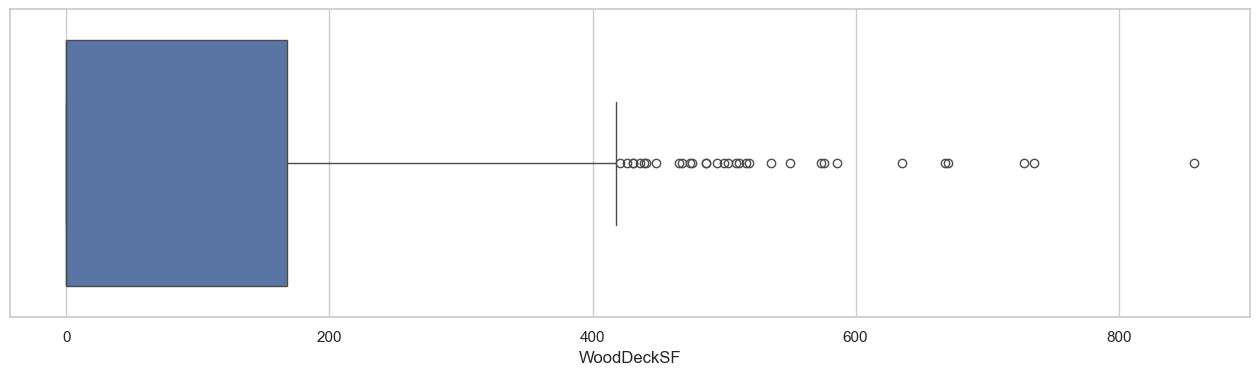

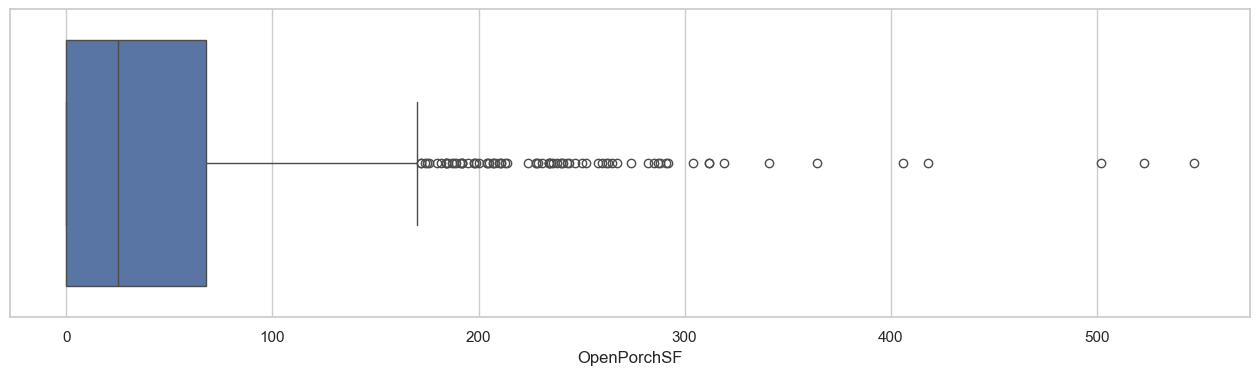

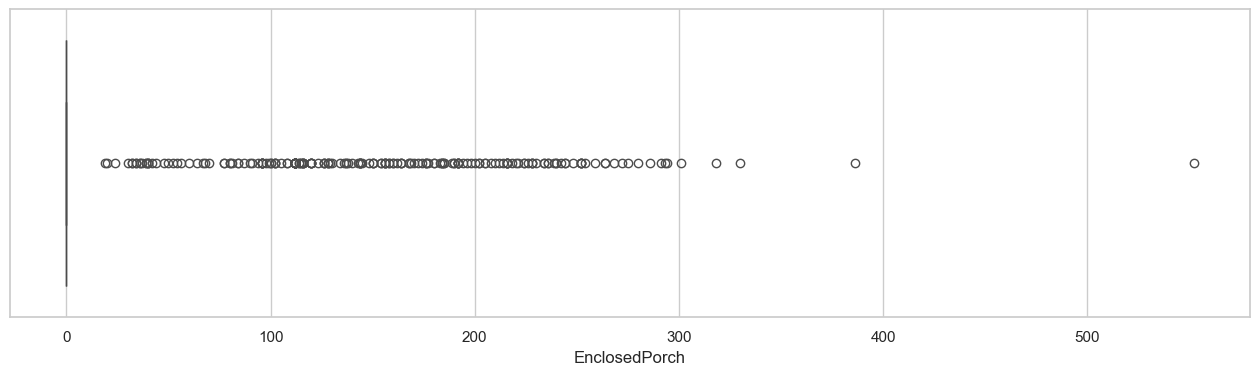

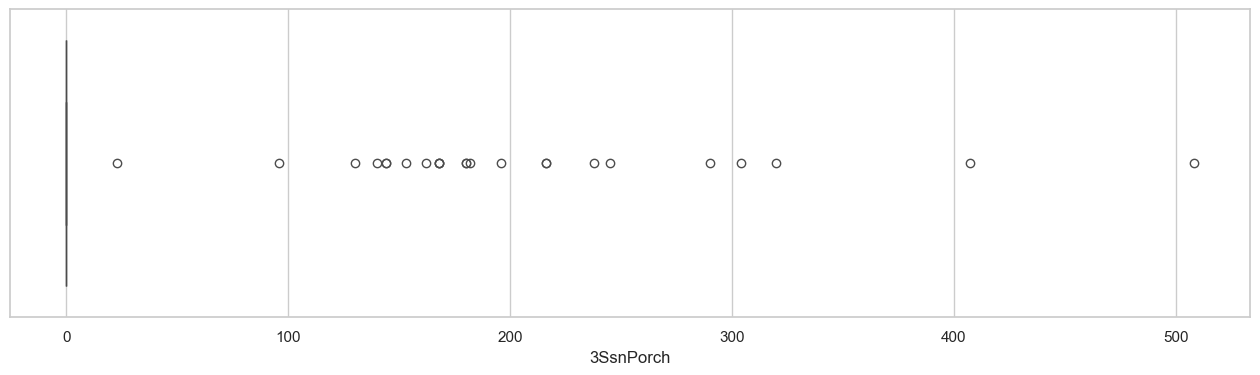

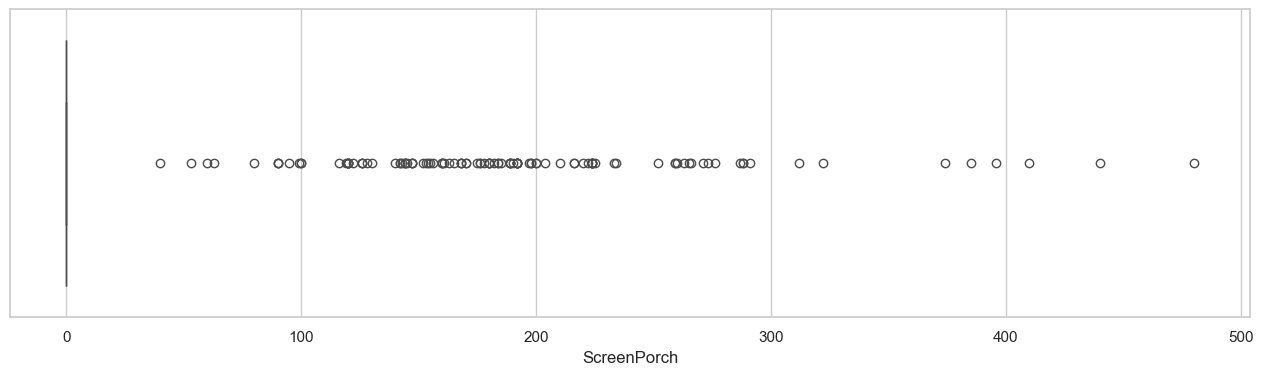

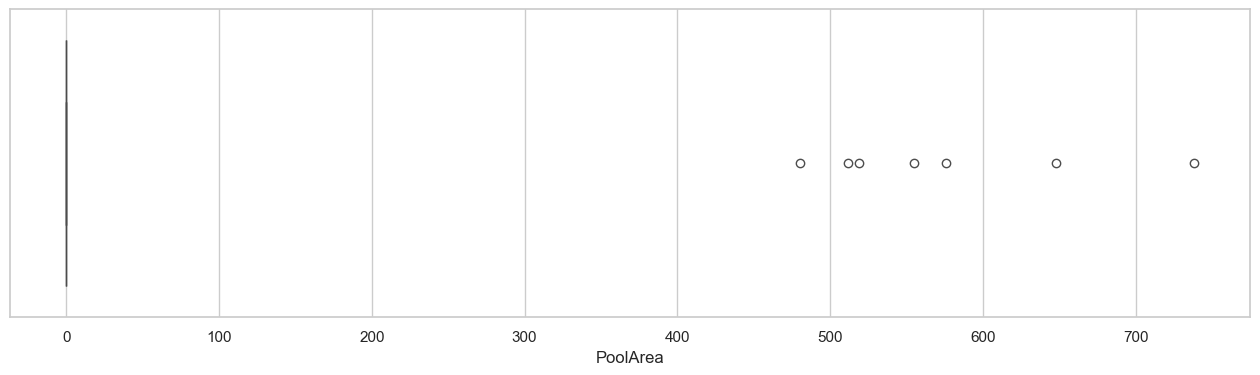

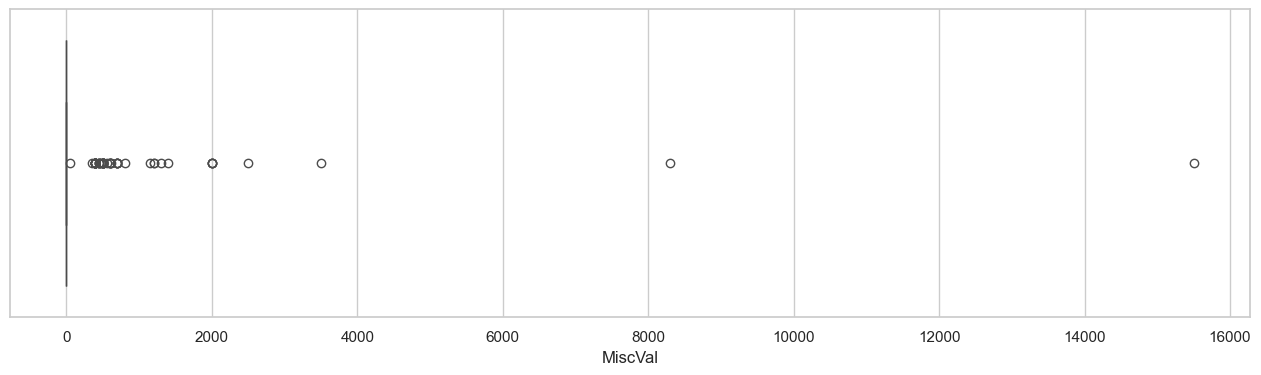

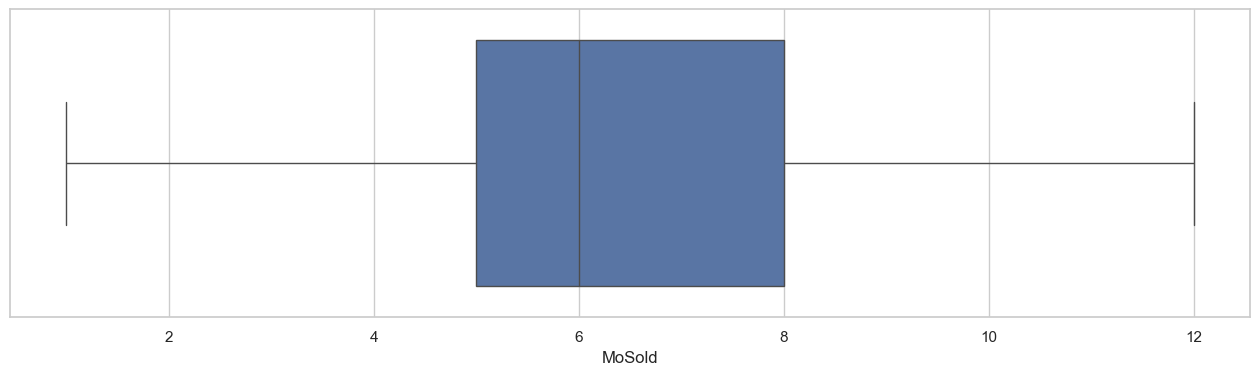

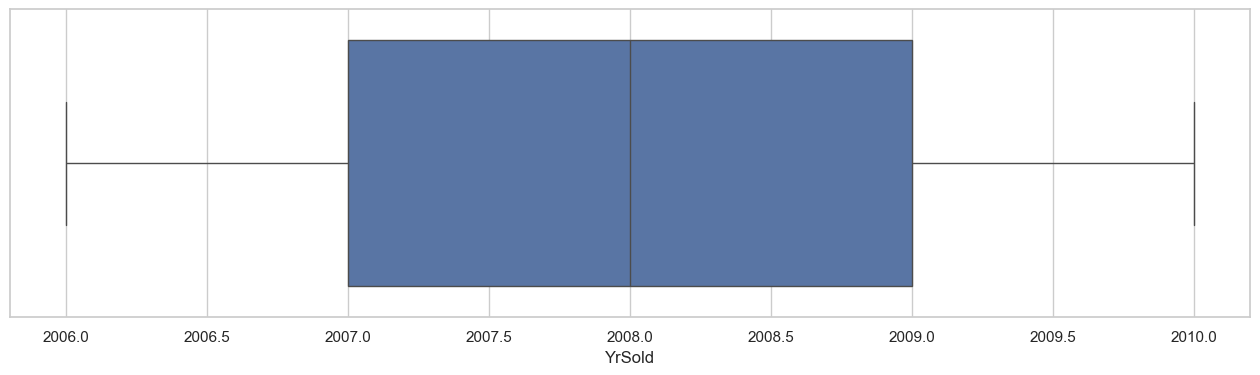

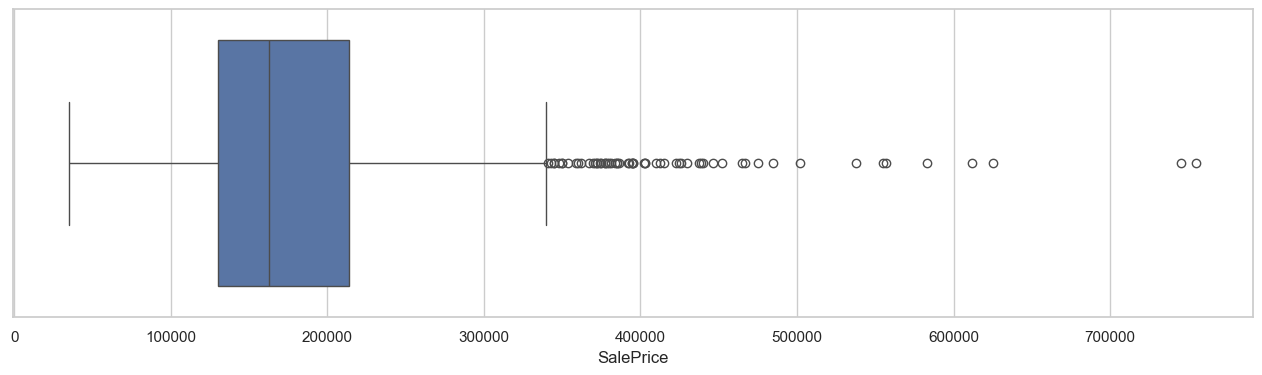

In [5]:
# Find outlier for all the numerical datasets (before handling missing values)

numerical_data=training_set.select_dtypes(exclude=['object'])
numerical_data=numerical_data.drop(["Id"], axis= 1)

for column in numerical_data:
    plt.figure(figsize=(16,4))
    sns.set_theme(style='whitegrid')
    sns.boxplot(numerical_data[column],orient='h')
    plt.xlabel(column)
    plt.show()

### Check for Missing Data

First, will combine the datasets for pre-processing. After will look at all the rows that contain null values

Will split up the dataframe again later for the models.

In [6]:
# Merge dataframes together
df= pd.concat([training_set, testing_set])

# Reset the index
df.reset_index(drop=True, inplace=True)

#Compare shapes
print(training_set.shape)
print(testing_set.shape)
print(df.shape)

# Output a list of the features that have missing data. Will show higgest number of null values first and 
df.isnull().sum().sort_values(ascending=False).head(30)

(1460, 81)
(1459, 80)
(2919, 81)


PoolQC          2909
MiscFeature     2814
Alley           2721
Fence           2348
MasVnrType      1766
SalePrice       1459
FireplaceQu     1420
LotFrontage      486
GarageYrBlt      159
GarageFinish     159
GarageQual       159
GarageCond       159
GarageType       157
BsmtExposure      82
BsmtCond          82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrArea        23
MSZoning           4
Functional         2
BsmtFullBath       2
Utilities          2
BsmtHalfBath       2
Electrical         1
TotalBsmtSF        1
BsmtUnfSF          1
KitchenQual        1
BsmtFinSF2         1
BsmtFinSF1         1
dtype: int64

## Fill in Missing Data

### Numerical:
- Fill in missing data with either **0** (which represents **"None"**), the **mean** or the **mod** for whichever maes more sense. **Except SalesPrice**.

### Categorical:
- Fill in the data with **"None"** if it seems that it makes sense. **Otherwise**, fill it with the **mode**.

### Individually Look Over Each Feature With Missing Data

In [7]:
# For loop For each feature that has missing data to better understand what it would need
# Using items allows to get columns and null counts directly
for col,null_count in df.isnull().sum().sort_values(ascending=False).items():
    if null_count > 0:
        # Show data and its frequency
        print(df[col].unique()),print(df[col].value_counts(dropna=False)),print("")
        

[nan 'Ex' 'Fa' 'Gd']
PoolQC
NaN    2909
Ex        4
Gd        4
Fa        2
Name: count, dtype: int64

[nan 'Shed' 'Gar2' 'Othr' 'TenC']
MiscFeature
NaN     2814
Shed      95
Gar2       5
Othr       4
TenC       1
Name: count, dtype: int64

[nan 'Grvl' 'Pave']
Alley
NaN     2721
Grvl     120
Pave      78
Name: count, dtype: int64

[nan 'MnPrv' 'GdWo' 'GdPrv' 'MnWw']
Fence
NaN      2348
MnPrv     329
GdPrv     118
GdWo      112
MnWw       12
Name: count, dtype: int64

['BrkFace' nan 'Stone' 'BrkCmn']
MasVnrType
NaN        1766
BrkFace     879
Stone       249
BrkCmn       25
Name: count, dtype: int64

[208500. 181500. 223500. 140000. 250000. 143000. 307000. 200000. 129900.
 118000. 129500. 345000. 144000. 279500. 157000. 132000. 149000.  90000.
 159000. 139000. 325300. 139400. 230000. 154000. 256300. 134800. 306000.
 207500.  68500.  40000. 149350. 179900. 165500. 277500. 309000. 145000.
 153000. 109000.  82000. 160000. 170000. 130250. 141000. 319900. 239686.
 249700. 113000. 127000. 177

### Fill in Missing Data
Set the data to the **median**, **mode**, or whatever makes the most intuitive sense

Won't look at average due to outliers, will leak Target Feature (SalePrice) alone

In [8]:
df['PoolQC'].fillna('None',inplace=True)
df['Alley'].fillna('None', inplace=True)
df['MiscFeature'].fillna('None', inplace=True)
df['Fence'].fillna('None', inplace=True)
df['MasVnrType'].fillna('None', inplace=True)
df['FireplaceQu'].fillna('None', inplace=True)
df['LotFrontage'].fillna(0, inplace=True)
# Assume year garage built = year house built
df['GarageYrBlt'].fillna(df['YearBuilt'], inplace=True)
# Fix error of 2207 year entry to 2007
df['GarageYrBlt'] = df['GarageYrBlt'].replace(2207, 2007)
df['GarageFinish'].fillna("None", inplace=True)
df['GarageQual'].fillna("None", inplace=True)
df['GarageCond'].fillna("None", inplace=True)
df['GarageType'].fillna("None", inplace=True)
df['BsmtExposure'].fillna("None", inplace=True)
df['BsmtCond'].fillna("None", inplace=True)
df['BsmtQual'].fillna("None", inplace=True)
df['BsmtFinType1'].fillna("None", inplace=True)
df['BsmtFinType2'].fillna("None", inplace=True)
df['MasVnrArea'].fillna(0, inplace=True)
df['MSZoning'].fillna('RL', inplace=True)
df['Functional'].fillna('Typ', inplace=True)
df['Utilities'].fillna('AllPub', inplace=True)
df['Electrical'].fillna('SBrkr', inplace=True)
df['TotalBsmtSF'].fillna(0, inplace=True)
df['BsmtUnfSF'].fillna(0, inplace=True)
df['KitchenQual'].fillna("None", inplace=True)
df['BsmtFinSF1'].fillna(0, inplace=True)
df['BsmtFinSF2'].fillna(0, inplace=True)
df['Exterior1st'].fillna('Exterior1st', inplace=True)
df['Exterior2nd'].fillna('Exterior2nd', inplace=True)
df['BsmtHalfBath'].fillna(0, inplace=True)
# Mode since most common value for garage cars
df['GarageCars'].fillna(2, inplace=True)
df['SaleType'].fillna('WD', inplace=True)
df['BsmtFullBath'].fillna(0, inplace=True)
df['GarageArea'].fillna(0, inplace=True)

Verify that all features no longer have missing data (excluding SalePrice).

In [9]:
df.isnull().sum().sort_values(ascending=False).head(5)

SalePrice      1459
CentralAir        0
GarageYrBlt       0
GarageType        0
FireplaceQu       0
dtype: int64

### Changing Data Types
Changing float to int.

Basement baths, for example, are listed as 0.0, 1.0, etc.

In [10]:
 print(df['BsmtFullBath'].unique()),print(df['BsmtFullBath'].value_counts())

[1. 0. 2. 3.]
BsmtFullBath
0.0    1707
1.0    1172
2.0      38
3.0       2
Name: count, dtype: int64


(None, None)

In [11]:
df['BsmtFullBath']=df['BsmtFullBath'].astype(int)
df['BsmtHalfBath']=df['BsmtHalfBath'].astype(int)
df['GarageYrBlt']=df['GarageYrBlt'].astype(int)
df['GarageCars']=df['GarageCars'].astype(int)

In [12]:
 print(df['BsmtFullBath'].unique()),print(df['BsmtFullBath'].value_counts())

[1 0 2 3]
BsmtFullBath
0    1707
1    1172
2      38
3       2
Name: count, dtype: int64


(None, None)

### <u>Feature Engineering</u>
Create and transform features while also creating new features to improve model performance. Allows for more meaningful patterns to be seen from the data. Will also drop unnecessary features.

**Combine related features**. Simplifies the data, reduces redundancy, and often creates more meaningful variables. Improves model performance by reducing noise from overlapping or correlated features.

In [13]:
# More meaningful to show accumulated age instead of year it was built
df['GarageYrBlt']=df['YrSold']-df['GarageYrBlt']
df['YearBuilt']=df['YrSold']-df['YearBuilt']
df['YearRemodAdd']=df['YrSold']-df['YearRemodAdd']

# combine the square feet
df['BsmtFinSF']=df['BsmtFinSF1']+df['BsmtFinSF2']
df['TotalFlrSF']=df['1stFlrSF']+df['2ndFlrSF']

# Combine bath features
df['TotalBaths'] = df['FullBath'] + (0.5 * df['HalfBath']) + df['BsmtFullBath'] + (0.5 * df['BsmtHalfBath'])

# Reduce Garage Features
df['GarageAreaPerCar']=df['GarageArea'] / df['GarageCars']
# Fill in any nulls from feature engineering
df['GarageAreaPerCar'].fillna(0, inplace=True)


# Drop uneccesary Columns
df.drop(['BsmtFinSF1', 'BsmtFinSF2', '1stFlrSF', '2ndFlrSF'], axis=1, inplace=True)
df.drop(['YrSold'], axis=1, inplace=True)
df.drop(['MoSold'], axis=1, inplace=True)
df.drop(['FullBath'], axis=1, inplace=True)
df.drop(['HalfBath'], axis=1, inplace=True)
df.drop(['BsmtFullBath'], axis=1, inplace=True)
df.drop(['BsmtHalfBath'], axis=1, inplace=True)
df.drop(['GarageArea'], axis=1, inplace=True)
df.drop(['GarageCars'], axis=1, inplace=True)

Will look at the **Correlation** between numeric features to understand better what features have an impact on sales price

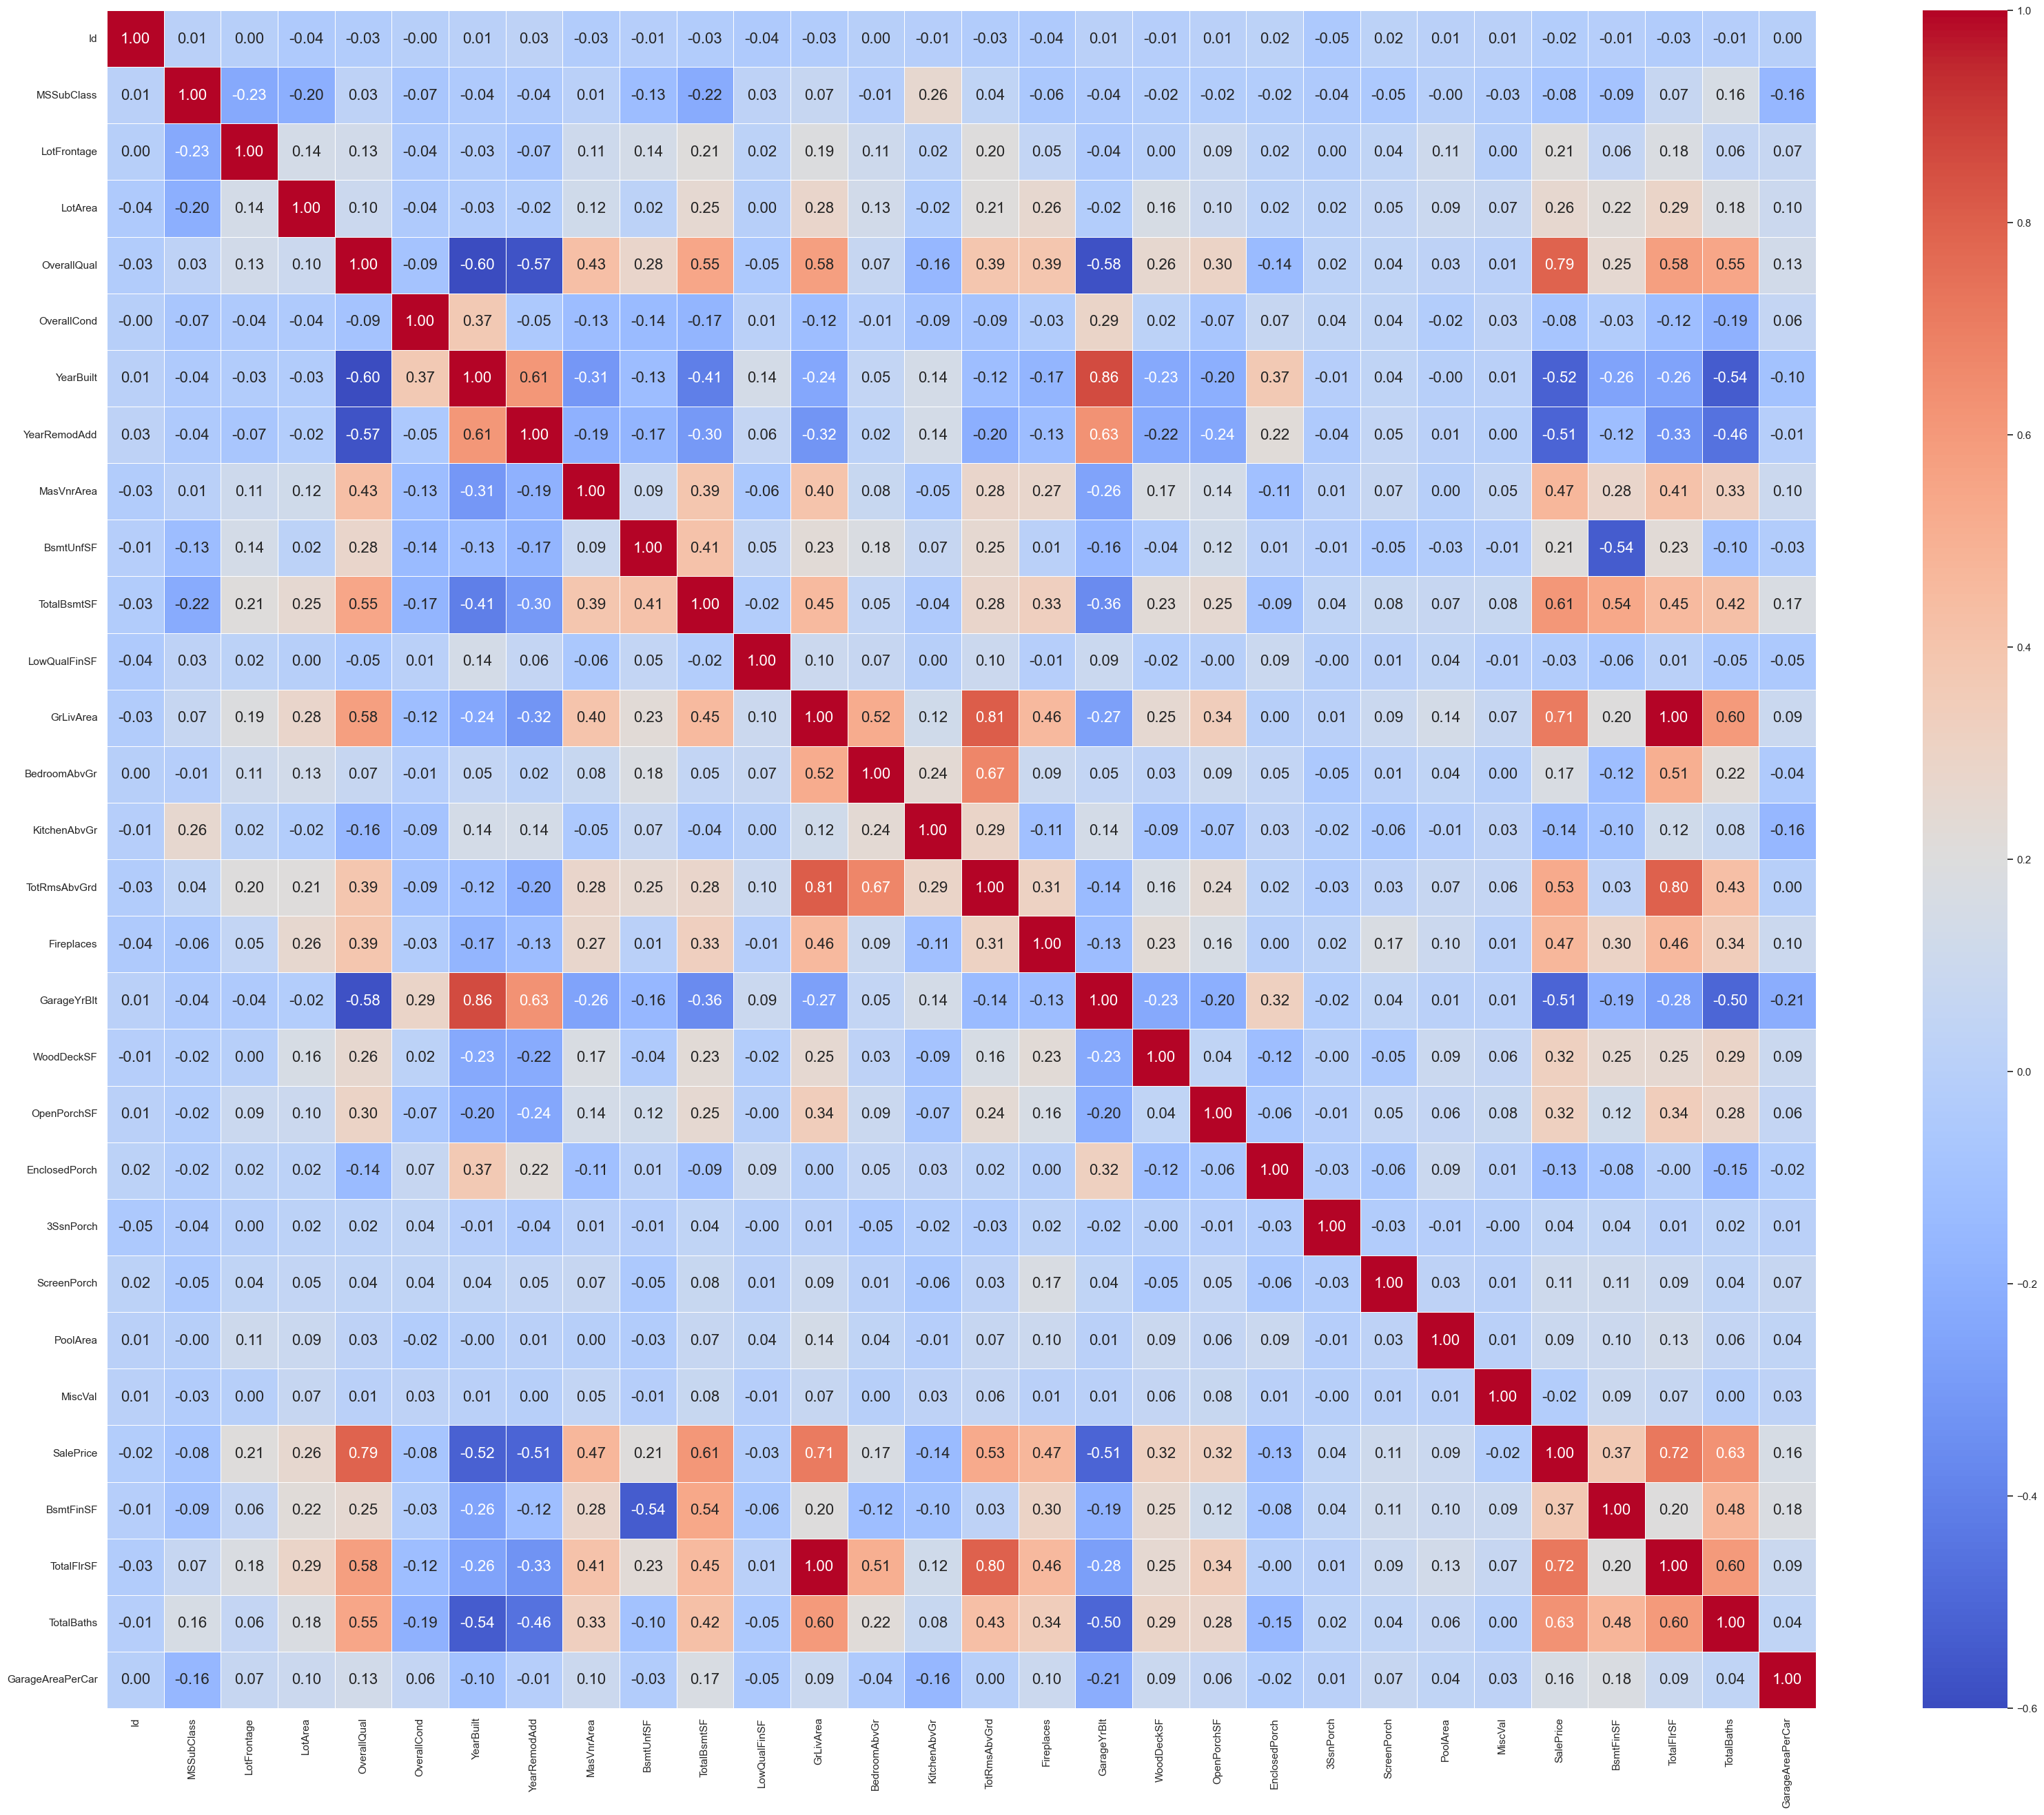

In [14]:
# Select only numeric columns and put into a data frame
numeric_df=df.select_dtypes(include='number')

# Create the correlation matrix
df_corr = numeric_df.corr().round(2)

# Create and show a heat map to show correlation between features
plt.figure(figsize=(40,32))
sns.heatmap(df_corr,annot=True,cmap='coolwarm', fmt="0.2f", linewidths=0.5, annot_kws={"size":16})
plt.show()

A higher value means a higher potential relation, and a higher negative value means a negative correlation

### Feature Transformation
Will alter the features or variables in the dataset to make them more suitable for analysis or modelling. 

Involves modifications to the distribution, scale, or relationship between the features. Feature transformation is as crucial as the quality and characteristics of the features, which significantly impact the performance of the models.

In [15]:
# Create a list of the numerical data types after the feature engineering
numerical_cols = [col_name for col_name in df.columns if df[col_name].dtypes!='object' and col_name !='SalePrice']

# Create new dataframe with numerical columns
skew_df = pd.DataFrame(numerical_cols,columns=['Feature'])

# This function used to compute the skewness of a dataset
skew_df['Skew']= skew_df['Feature'].apply(lambda feature:scipy.stats.skew(df[feature]))

# Change skew to positive number
skew_df['Absolute Skew'] = skew_df['Skew'].apply(abs)

# Create true/false columns based on if Absolute Skew is >= 0.5
# If feature has a skew number >=0.5, too many outliers, run feature through log transformation to make it closer to a normal distribution
skew_df['Skewed'] = skew_df['Absolute Skew'].apply(lambda x:True if x >=0.5 else False)

Output Skew DataFrame

In [16]:
skew_df

,Feature,Skew,Absolute Skew,Skewed
0,Id,0.000000,0.000000,False
1,MSSubClass,1.375457,1.375457,True
2,LotFrontage,0.022013,0.022013,False
3,LotArea,12.822431,12.822431,True
4,OverallQual,0.197110,0.197110,False
5,OverallCond,0.570312,0.570312,True
6,YearBuilt,0.598609,0.598609,True
7,YearRemodAdd,0.450226,0.450226,False
8,MasVnrArea,2.613592,2.613592,True
9,BsmtUnfSF,0.919339,0.919339,True


Check if a column has a min of 0 for log transformation

In [17]:
df[numerical_cols].describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtUnfSF,TotalBsmtSF,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,BsmtFinSF,TotalFlrSF,TotalBaths,GarageAreaPerCar
count,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,1460.000000,57.137718,57.766701,10168.114080,6.089072,5.564577,36.479959,23.528263,101.396026,560.579993,1051.417266,4.694416,1500.759849,2.860226,1.044536,6.451524,0.597122,31.607400,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,490.837273,1496.065433,2.218397,257.558056
std,842.787043,42.517628,33.481636,7886.996359,1.409947,1.113131,30.336182,20.892061,178.854579,439.590889,441.120498,46.396825,506.051045,0.822693,0.214462,1.569379,0.646129,26.758113,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,477.209821,503.675790,0.808840,86.049842
min,1.000000,20.000000,0.000000,1300.000000,1.000000,1.000000,-1.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,2.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,1.000000,0.000000
25%,730.500000,20.000000,43.000000,7478.000000,5.000000,5.000000,7.000000,4.000000,0.000000,220.000000,793.000000,0.000000,1126.000000,2.000000,1.000000,5.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1120.000000,1.500000,226.500000
50%,1460.000000,50.000000,63.000000,9453.000000,6.000000,5.000000,35.000000,15.000000,0.000000,467.000000,989.000000,0.000000,1444.000000,3.000000,1.000000,6.000000,1.000000,30.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,457.000000,1440.000000,2.000000,262.666667
75%,2189.500000,70.000000,78.000000,11570.000000,7.000000,6.000000,54.500000,43.000000,163.500000,805.000000,1302.000000,0.000000,1743.500000,3.000000,1.000000,7.000000,1.000000,49.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,805.500000,1742.500000,2.500000,294.000000
max,2919.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,136.000000,60.000000,1600.000000,2336.000000,6110.000000,1064.000000,5642.000000,8.000000,3.000000,15.000000,4.000000,136.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,5644.000000,5642.000000,7.000000,924.000000


In [18]:
# Apply log transformation to df whose above a 0.5 absolute skew
for column in skew_df.query("Skewed == True")['Feature'].values:
    df[column] = np.log1p(df[column])

### Encoding Categorical Features
Before training a machine learning model, it’s essential to convert **categorical features** (text labels) into a numerical format, since most algorithms can't work with raw string data.

In [19]:
# Get list of numerical features before starting
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
numerical_cols = numerical_cols.drop('SalePrice')
numerical_cols = numerical_cols.drop('Id')

### Changing Columns That Describe Ranked Quality
Some columns use category labels like "Poor", "Fair", or "Excellent" to describe the quality of things like the kitchen, garage, or materials. These labels have a clear order, so we convert them into numbers to help the machine learning model understand and use the quality information correctly.

If "None" appears in the data it adds a value for that too.

In [20]:
# Get a list of categorical columns
categorical_columns_list = df.select_dtypes(include='object').columns

# Create a new Dataframe containing only the categorical columns
df_categorical = df[categorical_columns_list].copy()

#Visualize the dataframe
df_categorical

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,None,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal
1,RL,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal
2,RL,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal
3,RL,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,None,None,None,WD,Abnorml
4,RL,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,RM,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,Gable,CompShg,CemntBd,CmentBd,None,TA,TA,CBlock,TA,TA,No,Unf,Unf,GasA,Gd,Y,SBrkr,TA,Typ,None,None,None,None,None,Y,None,None,None,WD,Normal
2915,RM,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,Gable,CompShg,CemntBd,CmentBd,None,TA,TA,CBlock,TA,TA,No,Rec,Unf,GasA,TA,Y,SBrkr,TA,Typ,None,CarPort,Unf,TA,TA,Y,None,None,None,WD,Abnorml
2916,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,CBlock,TA,TA,No,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Detchd,Unf,TA,TA,Y,None,None,None,WD,Abnorml
2917,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,Gable,CompShg,HdBoard,Wd Shng,None,TA,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,TA,Y,SBrkr,TA,Typ,None,None,None,None,None,Y,None,MnPrv,Shed,WD,Normal


For each column, it checks if the word "None" appears in the data (meaning something is missing or not there), and if so, it adds a value for that too. Then, it replaces all the words (like "Poor", "Fair", "Good", "Excellent") with numbers, so the computer can understand and use them for learning or predicting things

### Feature Encoding

#### Features with Categorical Data Representing Ranked Quality

In [21]:
# The label encode all the original data

# List of categorical columns with a clear order or ranking (ranked categories)
ranked_categorical_cols = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 
                 'GarageQual', 'GarageCond', 'PoolQC']

# For loop than encodes all labels
for col in ranked_categorical_cols:
    #If "None Present, set it as 0, then assign ascending number reflecting ranking
    if 'None' in df[col].value_counts().index:
        df[col] = df[col].map({"None":0,"Po":1,"Fa":2,"TA":3,"Gd":4,"Ex":5}).astype('int')
    # Assign ascending number reflecting ranking   
    else:
        df[col] = df[col].map({"Po":1,"Fa":2,"TA":3,"Gd":4,"Ex":5}).astype('int')

#### Categorical Features without a Ranking
Have to go case by case

In [22]:
unranked_categorical_cols = ['LotShape', 'LandContour', 'LandSlope', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
                 'Utilities', 'CentralAir', 'Functional', 'GarageFinish', 'PavedDrive', 'Fence']

df['LotShape'] = df['LotShape'].map({"None":0,"IR3":1,"IR2":2,"IR1":3,"Reg":4}).astype('int')
df['LandContour'] = df['LandContour'].map({"None":0,"Low":1,"Bnk":2,"HLS":3,"Lvl":4}).astype('int')
df['LandSlope'] = df['LandSlope'].map({"None":0,"Sev":1,"Mod":2,"Gtl":3}).astype('int')
df['BsmtExposure'] = df['BsmtExposure'].map({"None":0, "No":1,"Mn":2,"Av":3,"Gd":4}).astype('int')
df['BsmtFinType1'] = df['BsmtFinType1'].map({"None":0, "Unf":1,"LwQ":2,"Rec":3,"BLQ":4,"ALQ":5,"GLQ":6}).astype('int')
df['BsmtFinType2'] = df['BsmtFinType2'].map({"None":0, "Unf":1,"LwQ":2,"Rec":3,"BLQ":4,"ALQ":5,"GLQ":6}).astype('int')
df['Utilities'] = df['Utilities'].map({"None":0,"ELO":1,"NoSeWa":2,"NoSewr":3,"AllPub":4}).astype('int')
df['CentralAir'] = df['CentralAir'].map({"None":0,"N":1,"Y":2}).astype('int')
df['Functional'] = df['Functional'].map({"None":0,"Sal":1,"Sev":2,"Maj2":3,"Maj1":4,"Mod":5,"Min2":6,"Min1":7,"Typ":8}).astype('int')
df['GarageFinish'] = df['GarageFinish'].map({"None":0,"Unf":1,"RFn":2,"Fin":3}).astype('int')
df['PavedDrive'] = df['PavedDrive'].map({"None":0,"N":1,"P":2,"Y":3}).astype('int')
df['Fence'] = df['Fence'].map({"None":0, "MnWw":1,"GdWo":2,"MnPrv":3,"GdPrv":4}).astype('int')

### One-Hot Encoding
***One-hot encoding*** changes categories like "Red", "Blue", or "Green" into separate columns. Each column shows a 1 or 0 to say if that category is present or not. This way, the model treats each category equally, without assuming any order. It’s useful for categories that don’t have a ranking or natural order.

One-hot encoding helps machine learning models understand categorical data without implying any order, preventing misleading relationships

In [23]:
# Drop the columns that have already been encoded as ordinal (ranked) from categorical dataframe
df_categorical = df_categorical.drop(columns=ranked_categorical_cols)
df_categorical = df_categorical.drop(columns=unranked_categorical_cols)

# Get the remaining categorical columns that need one-hot encoding
onehot_cols = df_categorical.columns.tolist()

# Apply one-hot encoding to these categorical columns, dropping the first category to avoid redundancy
df_encoded = pd.get_dummies(df[onehot_cols], drop_first=True).astype(int)

# Remove the original one-hot encoded columns from the main dataframe
df = df.drop(columns=onehot_cols)

# Add the new one-hot encoded columns back to the dataframe
df = pd.concat([df, df_encoded], axis=1)

# Output DataFrame that now has categorical features in numeric values ready for machine learning
df

,Id,MSSubClass,LotFrontage,LotArea,LotShape,LandContour,Utilities,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,SalePrice,BsmtFinSF,TotalFlrSF,TotalBaths,GarageAreaPerCar,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_None,Alley_Pave,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_Exterior1st,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_Exterior2nd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,4.110874,65.0,9.042040,4,4,4,3,7,1.791759,1.791759,5,5.283204,4,3,4,3,1,6,1,5.017280,6.753438,5,2,0.0,7.444833,3,0.693147,4,2.197225,8,0.000000,0,1.791759,2,3,3,3,0.000000,4.127134,0.000000,0.0,0.0,0.0,0,0,0.000000,208500.0,6.561031,7.444833,3.5,274.000000,0,0,1,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,2,3.044522,80.0,9.169623,4,4,4,3,6,2.197225,3.465736,31,0.000000,3,3,4,3,4,5,1,5.652489,7.141245,5,2,0.0,7.141245,3,0.693147,3,1.945910,8,0.693147,3,3.465736,2,3,3,3,5.700444,0.000000,0.000000,0.0,0.0,0.0,0,0,0.000000,181500.0,6.886532,7.141245,2.5,230.000000,0,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0

## 5. Modelling

First split the data into training and test sets and prepare them by removing unnecessary columns. 

Then, we use Optuna to tune the parameters for both CatBoost and XGBoost models to find the best settings for accurate predictions. Finally, we train and test these models with the best settings to compare their performance.

In [24]:
# Split the data back into train and test sets
df_train = df.iloc[:training_set.shape[0]]
df_test = df.iloc[training_set.shape[0]:]

# Remove the 'Id' column from training and test sets since it's just an identifier and not useful for modeling
# Also remove the target 'SalePrice' from the test set to keep it separate for prediction
df_train.drop(['Id'], axis=1, inplace=True)
df_test.drop(['SalePrice', 'Id'], axis=1, inplace=True)

### Target Feature Encoding
Perform log transformation on SalePrice so it's less skewed

In [25]:
# Apply log transformation to the target variable 'SalePrice' to reduce skewness and improve model performance
log_target = np.log(df_train['SalePrice'])

# Remove the original 'SalePrice' column from training data since we now use the log-transformed target
df_train.drop(['SalePrice'], axis=1, inplace=True)

### Using Optuna for Optimal Hyperparmeter Tuning

This code uses **Optuna** to automatically find optimal hyperparameters for both **CatBoost** and **XGBoost** models to make accurate predictions. It tries different values for things like how long the model trains (iterations), how fast it learns (learning_rate), and how deep the trees are (depth). For each set of settings, the model is trained and **tested using cross-validation**, and the average **RMSE (a measure of error) is calculated**. The goal is to find the combination of settings that gives the lowest RMSE, meaning the model is predicting as accurately as possible.

In [ ]:
# Ctrl + /   TO UNCOMMENT/COMMENT WHOLE BLOCK

# COMMENT/UNCOMMENT ALL CODING BLOCKS FROM HERE ON WHEN OPTIMAL PARAMETERS ARE ALREADY KNOWN IN THE FUTURE TO SAVE COMPUTATION TIME

In [ ]:
# Create function for Optuna for catboost
def objective_cat(trial):
    # Define hyperparameters to optimize
    catboost_params = {
        'iterations': trial.suggest_int('iterations', 1000, 8000),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.08),
        'depth': trial.suggest_int('depth', 3, 7),
        'eval_metric': 'RMSE',
    }

    # Create the CatBoost model using the best parameters found by Optuna
    catboost_model = CatBoostRegressor(**catboost_params, verbose=0)
    
    # Train models
    catboost_model.fit(df_train, log_target)

    # Calculate RMSE
    kf = KFold(n_splits=10)
    catboost_rmse = np.exp(np.sqrt(-cross_val_score(catboost_model, df_train, log_target, scoring='neg_mean_squared_error', cv=kf)))

    # Return average RMSE
    return np.mean(catboost_rmse)

In [27]:
# Define objective function for Optuna for xgboost
def objective_xgb(trial):
    # Define hyperparameters to optimize
    xgboost_params = {
        'n_estimators': trial.suggest_int('n_estimators', 1000, 8000),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.08),
        'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.2, 0.6),
        'subsample': trial.suggest_uniform('subsample', 0.4, 0.8),
        'min_child_weight': trial.suggest_int('min_child_weight', 2, 5),
    }

    # Create the XGBoost model using the best parameters found by Optuna
    xgb_model = XGBRegressor(**xgboost_params, verbosity=0)

    # Train models
    xgb_model.fit(df_train, log_target)

    # Calculate RMSE
    kf = KFold(n_splits=10)
    xgb_rmse = np.exp(np.sqrt(-cross_val_score(xgb_model, df_train, log_target, scoring='neg_mean_squared_error', cv=kf)))

    # Return average RMSE
    return np.mean(xgb_rmse)

In [28]:
# Optimize hyperparameters for CatBoost
study_cat = optuna.create_study(direction='minimize')
study_cat.optimize(objective_cat, n_trials=50)

[I 2025-07-28 16:43:39,676] A new study created in memory with name: no-name-e3041702-cba4-442f-9b49-28c0e30915a9
[I 2025-07-28 16:44:19,583] Trial 0 finished with value: 1.12583432551301 and parameters: {'iterations': 1263, 'learning_rate': 0.04195152782173992, 'depth': 6}. Best is trial 0 with value: 1.12583432551301.
[I 2025-07-28 16:46:28,708] Trial 1 finished with value: 1.1259142250390028 and parameters: {'iterations': 3879, 'learning_rate': 0.012131472535470941, 'depth': 6}. Best is trial 0 with value: 1.12583432551301.
[I 2025-07-28 16:47:02,711] Trial 2 finished with value: 1.126115348086771 and parameters: {'iterations': 1813, 'learning_rate': 0.028362620919188026, 'depth': 4}. Best is trial 0 with value: 1.12583432551301.
[I 2025-07-28 16:50:50,221] Trial 3 finished with value: 1.1278383304359187 and parameters: {'iterations': 7060, 'learning_rate': 0.06928645535748065, 'depth': 6}. Best is trial 0 with value: 1.12583432551301.
[I 2025-07-28 16:51:48,808] Trial 4 finished wi

KeyboardInterrupt: 

In [ ]:
# Optimize hyperparameters XGBoost
study_xgb = optuna.create_study(direction='minimize')
study_xgb.optimize(objective_xgb, n_trials=50)

In [ ]:
# Get best parameters
best_params_cat = study_cat.best_params
best_params_xgb = study_xgb.best_params

Output optimal hyperparameters found by Optuna for both the CatBoost and XGBoost models. Display also the lowest RMSE (error) each model achieved during tuning to better understand which settings led to the most accurate predictions.

In [ ]:
# Print the best hyperparameters found by Optuna for the CatBoost model
print(best_params_cat)

# Print the lowest RMSE achieved during CatBoost tuning
print(study_cat.best_value)

# Print the best hyperparameters found by Optuna for the XGBoost model
print(best_params_xgb)

# Print the lowest RMSE achieved during XGBoost tuning
print(study_xgb.best_value)

In [ ]:
# COMMENT/UNCOMMENT TO HERE ALL CODE BLOCKS WHEN OPTIMAL PARAMETERS ARE ALREADY KNOWN IN THE FUTURE TO SAVE COMPUTATION TIME

### Forming and Testing the Model

Will build the final CatBoost and XGBoost models using the best hyperparameters found by Optuna. Each model is then trained on the full training data with the log-transformed target to prepare for making predictions.

In [ ]:
best_params_cat = {
    'iterations': 6623,
    'learning_rate': 0.01711,
    'depth': 5,
    'eval_metric':'RMSE',
}

best_params_xgb = {
    'n_estimators': 6696,
    'learning_rate': 0.00630,
    'colsample_bytree': 0.22301,
    'subsample': 0.45878,
    'min_child_weight': 3,
}

In [ ]:
# Use best parameters to train final models
catboost_model = CatBoostRegressor(**best_params_cat, verbose=0)
xgb_model = XGBRegressor(**best_params_xgb, verbosity=0)

catboost_model.fit(df_train, log_target)
xgb_model.fit(df_train, log_target)

## 6. Experimentation

Evaluating model performance (with cross-validation RMSE) and combining model predictions

In [ ]:
# Calculate RMSE for CatBoost
kf = KFold(n_splits=10)
catboost_rmse = np.exp(np.sqrt(-cross_val_score(catboost_model, df_train, log_target, scoring='neg_mean_squared_error', cv=kf)))

# Calculate RMSE for XGBoost
xgb_rmse = np.exp(np.sqrt(-cross_val_score(xgb_model, df_train, log_target, scoring='neg_mean_squared_error', cv=kf)))

In [ ]:
# Output average RMSE achieved by CatBoost and XGBoost
print(np.mean(catboost_rmse))
print(np.mean(xgb_rmse))

## 7. Submission

In [ ]:
# Save test predictions to file
output = pd.DataFrame({'Id': df_test.index+1, 'SalePrice': final_predictions})
output.to_csv('submission.csv', index=False)

In [ ]:
# Look at the prediction results
output